In [1]:
import os
import re
import glob
import json
import shutil
import cc3d
import mlxtend
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import nibabel as nib
import statsmodels.api as sm
from typing import Dict, List
from scipy import stats
from nilearn import plotting
from tqdm.notebook import tqdm
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from nipype.interfaces import fsl
from mlxtend.plotting import plot_linear_regression
import xml.etree.ElementTree as ET

from misc_utils import *
from preproc_interactive import *
warnings.filterwarnings("ignore")

In [2]:
meta_info = misc_meta()
with open('/home/socrates/david/tsc/codebase/data/NEW_INTEG.json', 'r') as f:
    NEW_INTEG = json.load(f)
NEW_INTEG['train']['10'].keys()

# # Saving Integ addr
# import json
# with open('/home/socrates/david/tsc/codebase/data/NEW_INTEG.json', 'w') as f:
#     json.dump(NEW_INTEG, f)

dict_keys(['FL_orig', 'T1_orig', 'T1_reg2FL', 'FL_brain', 'T1_reg2FL_brain', 'mask_FL_brain', 'mask_orig1', 'mask_orig2', 'mask_inter', 'mask_union', 'pred_inter_both', 'pred_inter_T1', 'pred_inter_FL', 'mat_T12FL', 'FL_brain_reg2tp', 'mask_FL_reg2tp', 'FL_reg2tp', 'T1_reg2tp', 'pred_reg2tp', 'pred_reg2tp_thr0.5', 'mask_FL_reg2tp_thr0.5', 'mask_FL_cysadded_reg2tp_thr0.5', 'FL_coronal_orig', 'mask_coronal', 'FL_coronal_brain', 'mask_FL_coronal_brain', 'T1_reg2FL_coronal', 'mat_T12FL_coronal', 'T1_reg2FL_coronal_brain'])

## Preprocess individual subject

In [ ]:
base_dir = '/home/socrates/david/tsc/codebase'
sub_id = '<subject to run. need both t1 and flair folders>'
dict_save_addr = '{}.json'.format(sub_id)
PREP = Preproc_TSC(base_dir)
PREP.base_preproc(sub_id)
PREP.save_dict(dict_save_addr)

PREP.mni_link_flair(sub_id)
PREP.save_dict(dict_save_addr)

PREP.get_pred(sub_id, pred_version= 'datav5_both')
PREP.save_dict(dict_save_addr)

PREP.mni_register_pred(sub_id, pred_version= 'datav5_both')
PREP.save_dict(dict_save_addr)



## Dynamic registration code sample

In [5]:
# ## dynamic registration of coronal slices
# base_dir = '.'
# PREP = Preproc_TSC(base_dir)

# for pid in tqdm(meta_info['coronalpid']):
    
#     # Setting up addresses in advance. Need to know the format in advance.
#     t1_addr = NEW_INTEG['train'][pid]['T1_orig']
#     flair_addr = NEW_INTEG['train'][pid]['FL_coronal_orig']
#     bet_outfile = append_name(t1_addr, adding='_brain.nii.gz')
#     bet_outmask = append_name(t1_addr, adding='_brain_mask.nii.gz')
    
#     reg_addr = append_name(t1_addr, adding='_coronal_reg.nii.gz')
#     regmat_addr = append_name(t1_addr, adding='_coronal_regmat.mat')
    
#     # flirt
#     PREP.reg_t1_to_flair_dynamic(t1_addr, flair_addr, reg_addr, regmat_addr)
#     # bet
#     PREP.flair_brain_extract_dynamic(flair_addr, bet_outfile, bet_outmask)
#     reg_brain_addr = append_name(t1_addr, adding='_coronal_reg_brain.nii.gz')
    
#     # T1: peel off skull
#     t1 = reg_addr
#     mask = bet_outmask
#     t1_meta = nib.load(t1)
#     t1_brain = nib.load(t1).get_fdata() * nib.load(mask).get_fdata()
#     t1_brain_save = nib.Nifti1Image(t1_brain.astype('int32'), t1_meta.affine, t1_meta.header)
#     nib.save(t1_brain_save, reg_brain_addr)
    
#     # save all results
#     NEW_INTEG['train'][pid]['FL_coronal_brain'] = bet_outfile
#     NEW_INTEG['train'][pid]['mask_FL_coronal_brain'] = bet_outmask
#     NEW_INTEG['train'][pid]['T1_reg2FL_coronal'] = reg_addr
#     NEW_INTEG['train'][pid]['mat_T12FL_coronal'] = regmat_addr
#     NEW_INTEG['train'][pid]['T1_reg2FL_coronal_brain'] = reg_brain_addr

## (BET / Reg / MNI Reg) for any scans in the inference

In [6]:
# base_dir = '/home/socrates/david/tsc/codebase'
# sub_id = 'sub1'
# dict_save_addr = '{}.json'.format(sub_id)
# PREP = Preproc_TSC(base_dir)
# PREP.base_preproc(sub_id)
# PREP.save_dict(dict_save_addr)
# PREP.mni_link_flair(sub_id)
# PREP.save_dict(dict_save_addr)
# PREP.get_pred(sub_id, pred_version= 'datav5_both')
# PREP.save_dict(dict_save_addr)
# PREP.mni_register_pred(sub_id, pred_version= 'datav5_both')
# PREP.save_dict(dict_save_addr)



In [7]:
base_dir = '/home/socrates/david/tsc/codebase'
sub_id = 'sub1'
dict_save_addr = '{}.json'.format(sub_id)
PREP = Preproc_TSC(base_dir)
PREP.load_dict(dict_save_addr)
PREP.sub_dict
PREP.mni_register_pred(sub_id, pred_version= 'datav5_both')

Dict loaded from: /home/socrates/david/tsc/codebase/data/inference/processed/sub1.json
210428-17:16:45,40 nipype.workflow INFO:
	 Workflow sub1_pred_wf settings: ['check', 'execution', 'logging', 'monitoring']
210428-17:16:45,49 nipype.workflow INFO:
	 Running in parallel.
210428-17:16:45,52 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 113.17/113.17, Free processors: 2/2.
210428-17:16:45,128 nipype.workflow INFO:
	 [Job 0] Cached (sub1_pred_wf.pickup).
210428-17:16:47,152 nipype.workflow INFO:
	 [Job 1] Cached (sub1_pred_wf.convert).
210428-17:16:49,164 nipype.workflow INFO:
	 [Job 2] Cached (sub1_pred_wf.pred2t1).
210428-17:16:51,167 nipype.workflow INFO:
	 [Job 3] Cached (sub1_pred_wf.predt12mni).
210428-17:16:53,188 nipype.workflow INFO:
	 [Node] Setting-up "sub1_pred_wf.DataSink" in "/home/socrates/david/tsc/codebase/results/registration/sub1/sub1_pred_wf/_sid_sub1/DataSink".
210428-17:16:53,215 nipype.workflow INFO:
	 [Node] Running "Dat

0

T1_warped_image.nii.gz (182, 218, 182)
FL_orig__TSC_10_AXIAL_FLAIR_20130814083854_4-Copy1_brain_flirt_trans.nii.gz (182, 218, 182)
vote_10.nii (256, 256, 34)
vote_10_flirt_trans.nii.gz (182, 218, 182)
vote_10_flirt_trans_threshold05.nii (182, 218, 182)


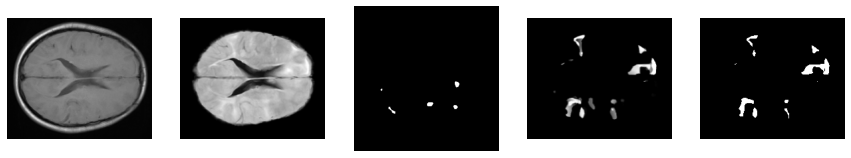

In [8]:
toshow = ['FL_reg2tp', 'FL_brain_reg2tp', 'pred_inter_both', 'pred_inter_both_reg2tp','pred_inter_both_reg2tp_thr0.5']
plot_many(*[PREP.sub_dict[sub_id][k] for k in toshow])

In [8]:
output_base = os.path.join(PREP.mni_dir, sub_id, 'output', 'experiment', sub_id + '_wf')
result_link = {'results@flair_warped':'FL_reg2tp',
              'results@flair_brain_warped': 'FL_brain_reg2tp',
              'results@mat_T12mni': 'mat_T12mni',
              'results@T1_warped': 'FL_reg2tp'}
for k in result_link.keys():
    PREP.sub_dict[sub_id][result_link[k]] = get_unique_file(os.path.join(output_base, '{}'.format(k), '_sid_{}'.format(sub_id)))
print('Generated and saved: FL_reg2tp, FL_brain_reg2tp, mat_T12mni, FL_reg2tp')  
PREP.save_dict(dict_save_addr)

Generated and saved: FL_reg2tp, FL_brain_reg2tp, mat_T12mni, FL_reg2tp
Dict saving done: /home/socrates/david/tsc/codebase/data/inference/processed/sub1.json


0

T1_orig__TSC_10_AXIAL_T1_20130814083854_14-Copy1.nii (256, 256, 34)
FL_orig__TSC_10_AXIAL_FLAIR_20130814083854_4-Copy1.nii (256, 256, 34)
T1_orig__TSC_10_AXIAL_T1_20130814083854_14-Copy1_reg.nii.gz (256, 256, 34)
FL_orig__TSC_10_AXIAL_FLAIR_20130814083854_4-Copy1_brain.nii.gz (256, 256, 34)
FL_orig__TSC_10_AXIAL_FLAIR_20130814083854_4-Copy1_brain_mask.nii.gz (256, 256, 34)
T1_orig__TSC_10_AXIAL_T1_20130814083854_14-Copy1_reg_brain.nii (256, 256, 34)
vote_10.nii (256, 256, 34)


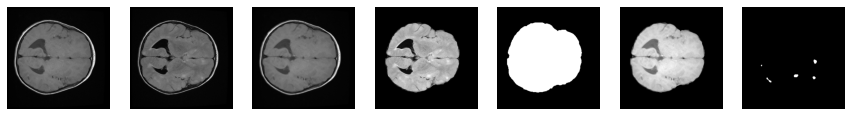

In [10]:
# PREP.load_dict('infer_integ.json')
plot_many(*[PREP.sub_dict['sub1'][k] for k in PREP.sub_dict['sub1'].keys() if 'mat'not in k])

In [7]:
NEW_INTEG['train']['10']['mask_inter']

'/home/socrates/david/tsc/codebase/data/train/10/mask_inter__10_mask.nii'

In [8]:
scout = nib.load(predictions[0])
summary = np.zeros((len(predictions), *scout.get_data().shape))
summary[0] = scout.get_data()
for i in range(1, summary.shape[0]):
    summary[i] = nib.load(predictions[i]).get_data()
    

In [9]:
# for i in range(0, summary.shape[0]):
for i in range(summary.shape[0]):
    majority_voting = summary.mean(axis=0) >= (i+1)/summary.shape[0]
    save_scan('./test.nii', majority_voting, scout)
    print('vote: {}, dice: {}, tdice: {}'.format(i+1,
                                                 get_dice('./test.nii', NEW_INTEG['train']['10']['mask_inter']),
                                                 get_tuber_dice('./test.nii', NEW_INTEG['train']['10']['mask_inter'])[0]                                                 
                                                ))
    print('per scan, dice: {}, tdice: {}'.format(
                                                 get_dice(predictions[i], NEW_INTEG['train']['10']['mask_inter']),
                                                 get_tuber_dice(predictions[i], NEW_INTEG['train']['10']['mask_inter'])[0]                                                 
                                                ))

save done: ./test.nii
vote: 1, dice: 0.8371715070452292, tdice: 0.8376068376068376
per scan, dice: 0.6144600172359052, tdice: 0.7863247863247863
save done: ./test.nii
vote: 2, dice: 0.8422790220847596, tdice: 0.9099099099099099
per scan, dice: 0.6349084331901425, tdice: 0.808695652173913
save done: ./test.nii
vote: 3, dice: 0.8307292137063998, tdice: 0.9047619047619048
per scan, dice: 0.5699971371314057, tdice: 0.8157894736842105
save done: ./test.nii
vote: 4, dice: 0.8177167624681437, tdice: 0.8981481481481481
per scan, dice: 0.7600016082988219, tdice: 0.875
save done: ./test.nii
vote: 5, dice: 0.805026656511805, tdice: 0.8962264150943396
per scan, dice: 0.7982962962962963, tdice: 0.8857142857142857
save done: ./test.nii
vote: 6, dice: 0.7930820295818937, tdice: 0.8899082568807339
per scan, dice: 0.6630586052265347, tdice: 0.7962962962962963
save done: ./test.nii
vote: 7, dice: 0.7803200948429164, tdice: 0.8703703703703703


KeyboardInterrupt: 

In [33]:
NEW_INTEG['train']

{'10': {'FL_orig': '/home/socrates/david/tsc/codebase/data/train/10/FL_orig__TSC_10_AXIAL_FLAIR_20130814083854_4.nii',
  'T1_orig': '/home/socrates/david/tsc/codebase/data/train/10/T1_orig__TSC_10_AXIAL_T1_20130814083854_14.nii',
  'T1_reg2FL': '/home/socrates/david/tsc/codebase/data/train/10/T1_reg2FL__TSC_10_AXIAL_T1_20130814083854_14_flirt.nii.gz',
  'FL_brain': '/home/socrates/david/tsc/codebase/data/train/10/FL_brain__TSC_10_AXIAL_FLAIR_20130814083854_4_brain.nii.gz',
  'T1_reg2FL_brain': '/home/socrates/david/tsc/codebase/data/train/10/T1_reg2FL_brain__TSC_10_AXIAL_T1_20130814083854_14_flirt_brain.nii',
  'mask_FL_brain': '/home/socrates/david/tsc/codebase/data/train/10/mask_FL_brain__TSC_10_AXIAL_FLAIR_20130814083854_4_brain_mask.nii.gz',
  'mask_orig1': '/home/socrates/david/tsc/codebase/data/train/10/mask_orig1__TSC10_discrete1.nii.gz',
  'mask_orig2': '/home/socrates/david/tsc/codebase/data/train/10/mask_orig2__TSC10_discrete2.nii.gz',
  'mask_inter': '/home/socrates/david/ts

In [14]:
NEW_INTEG['test'].keys()

dict_keys(['1', '25', '41', '51', '21', '8', '6', '31'])

### Testing that ensemble works better than indiv

In [6]:
## Testing majority voting on the test set
all_idx = [2, 3, 10, 12, 15, 20, 29, 39, 40, 42, 44, 45, 46, 47, 50, 52, 59, 62, 63, 66, 68]
inferred_dir = '/home/socrates/david/tsc/TSCseg/Refactorized/test_results'
all_subjects = [str(a) for a in range(8)]
result_dict = {}

for v in ['datav5_both', 'datav5_noFL', 'datav5_noT1', 'datav5_cystic']:   
    result_dict[v] = {}
    version_dir = os.path.join(inferred_dir, '{}'.format(v))
    
    for k in all_idx:        
        result_dict[v][str(k)] = {}
        for sid in all_subjects:
            sid_dir = os.path.join(version_dir, str(k), sid)
            result_dict[v][str(k)][sid] = glob.glob(sid_dir + '/*')[0]
        

In [8]:
vote = {}
indiv = {}
for here_idx in range(8):
    real_idx = meta_info['testid2orig'][meta_info['test2id'][str(here_idx + 100)]]
    here_idx = str(here_idx)
    vote[real_idx] = {'dice':[], 'tdice':[]}
    indiv[real_idx] = {'dice':[], 'tdice':[]}
    
    preds = [result_dict['datav5_both'][str(sid)][here_idx] for sid in all_idx]
    scout = nib.load(preds[0])
    summary = np.zeros((len(preds), *scout.get_data().shape))
    summary[0] = scout.get_data()
    for i in range(1, summary.shape[0]):
        summary[i] = nib.load(preds[i]).get_data()
    summary[0].sum()
    
    for i in tqdm(range(summary.shape[0])):
        majority_voting = summary.mean(axis=0) >= (i+1)/summary.shape[0]
        save_scan('./test.nii', majority_voting, scout, verbose=False)

        vote[real_idx]['dice'].append(get_dice('./test.nii', NEW_INTEG['test'][real_idx]['mask_orig']))
        vote[real_idx]['tdice'].append(get_tuber_dice('./test.nii', NEW_INTEG['test'][real_idx]['mask_orig'])[0])                                       
    
    for i in tqdm(range(summary.shape[0])):
        indiv[real_idx]['dice'].append(get_dice(preds[i], NEW_INTEG['test'][real_idx]['mask_orig']))
        indiv[real_idx]['tdice'].append(get_tuber_dice(preds[i], NEW_INTEG['test'][real_idx]['mask_orig'])[0])

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

pid 1


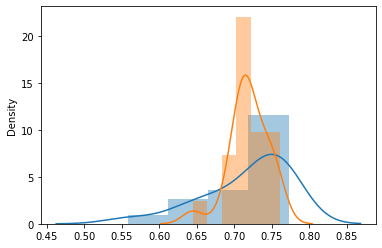

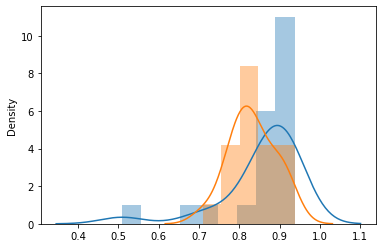

 
 
pid 25


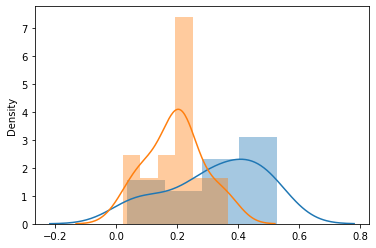

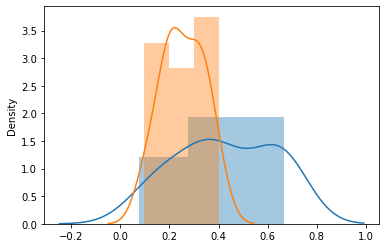

 
 
pid 41


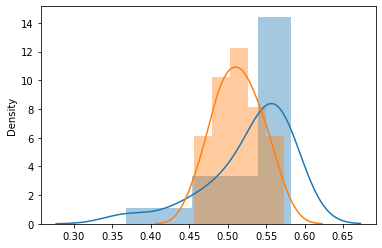

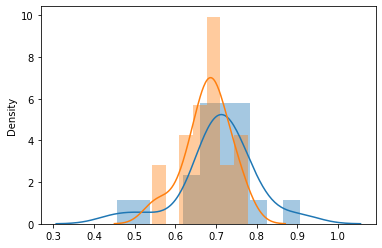

 
 
pid 51


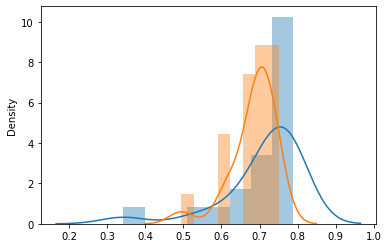

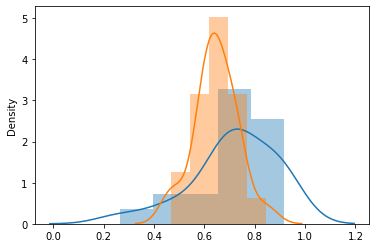

 
 
pid 21


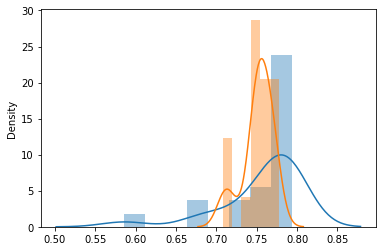

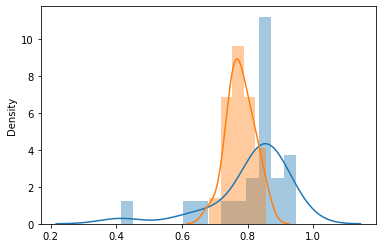

 
 
pid 8


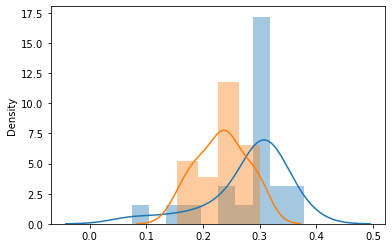

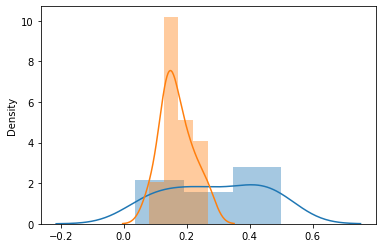

 
 
pid 6


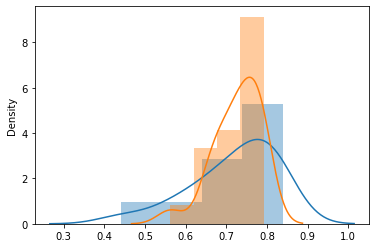

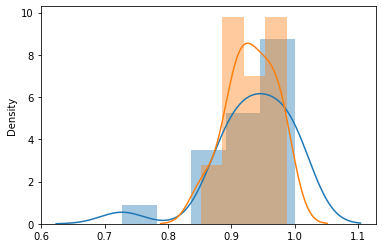

 
 
pid 31


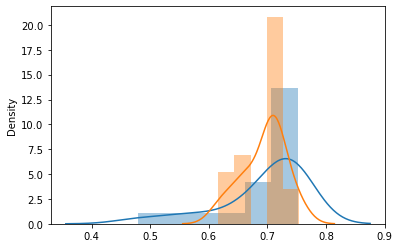

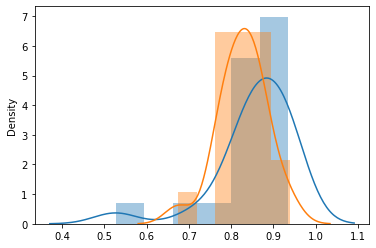

In [9]:
for pid in vote.keys():
    print('pid {}'.format(pid))
    fig, ax = plt.subplots()
    sns.distplot(vote[pid]['dice'], ax=ax)
    sns.distplot(indiv[pid]['dice'], ax=ax)
    plt.show()

    fig, ax = plt.subplots()
    sns.distplot(vote[pid]['tdice'], ax=ax)
    sns.distplot(indiv[pid]['tdice'], ax=ax)
    plt.show()
    print(' ')
    print(' ')

In [32]:
metric = 'dice'
vote8 = []
median8 = []
for pid in vote.keys():
    vote8.append(vote[pid][metric][10])
    median8.append(np.median(np.array(vote[pid][metric])))
    print(pid)
    print(vote[pid][metric][10])
    print(np.median(np.array(vote[pid][metric])))
    
print(np.array(vote8).mean(), np.array(median8).mean())
    

1
0.7468707297075704
0.7402978464263965
25
0.46114432109308284
0.3534018600097895
41
0.5539319361661219
0.5461966604823748
51
0.7519582245430809
0.7519582245430809
21
0.7890641730316226
0.7775756573507524
8
0.3042291950886767
0.3016359918200409
6
0.7451568774546578
0.7451568774546578
31
0.7438040941718607
0.726489052690758
0.6370199439070843 0.6178390213472313


1


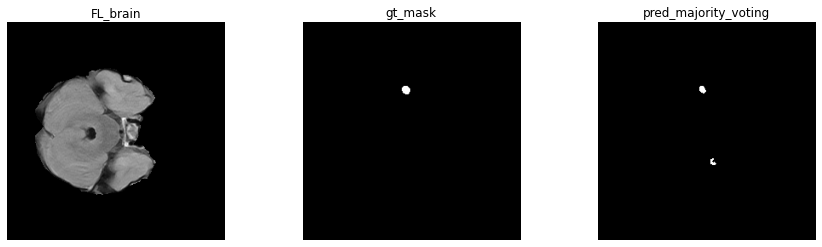

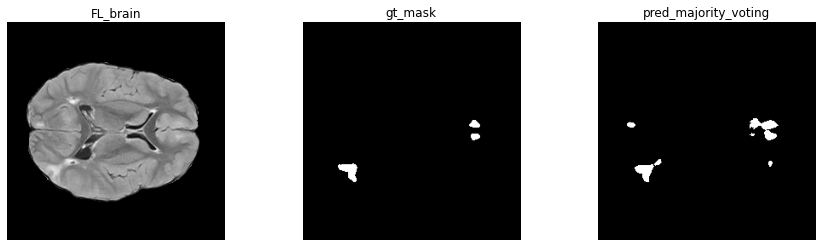

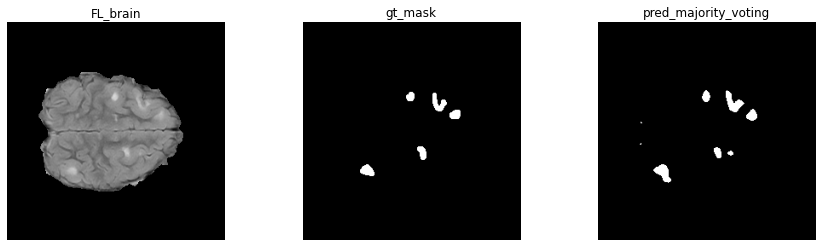

25


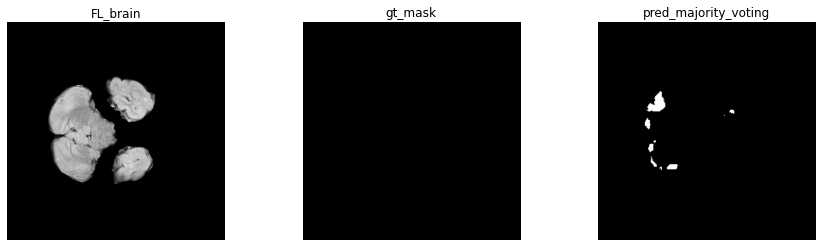

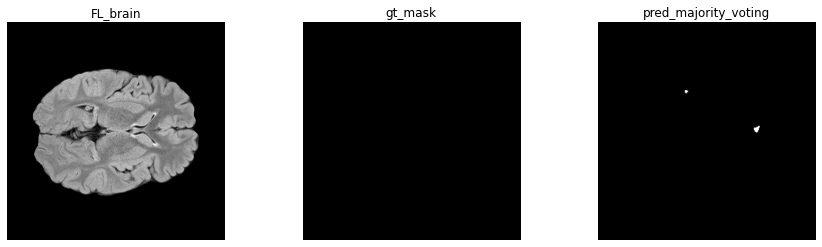

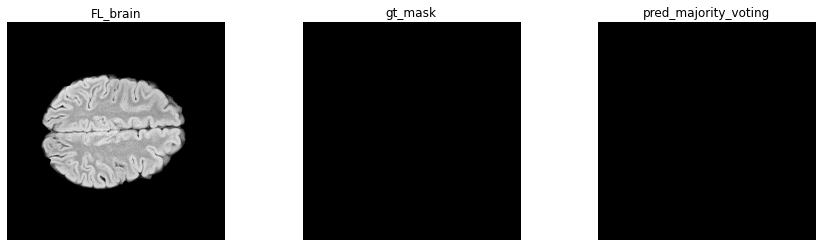

41


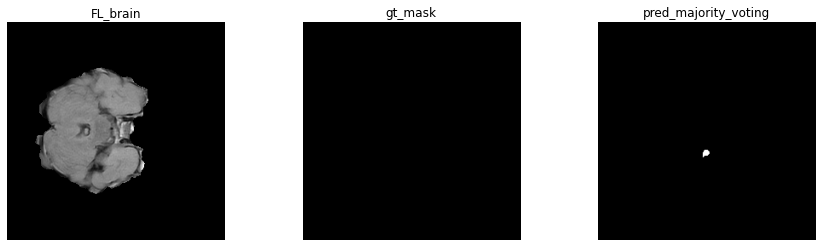

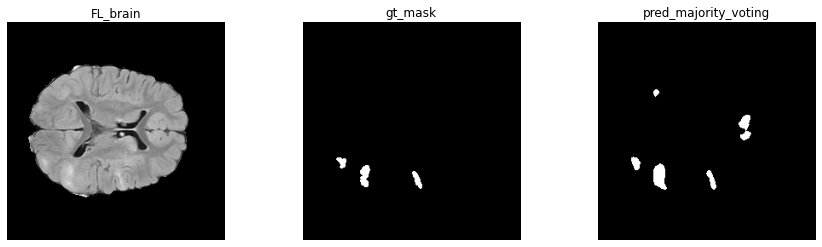

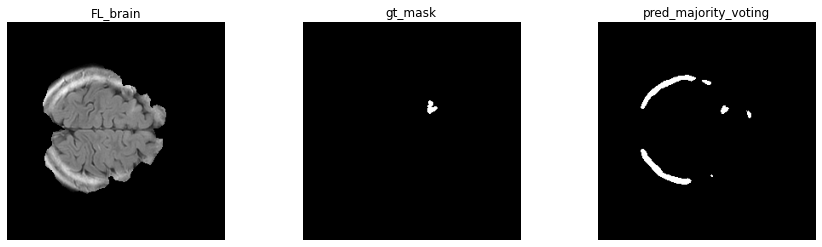

51


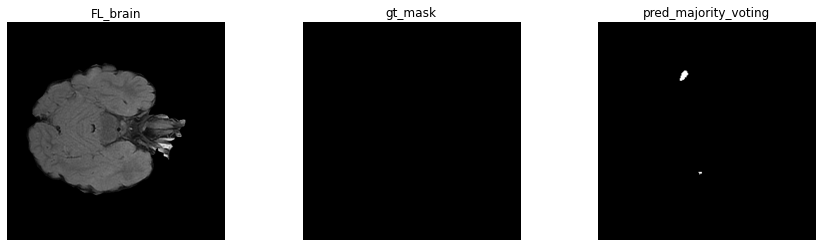

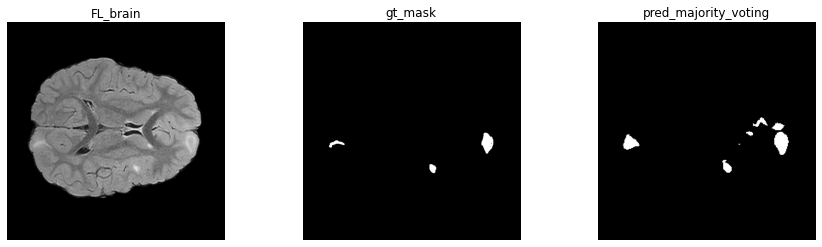

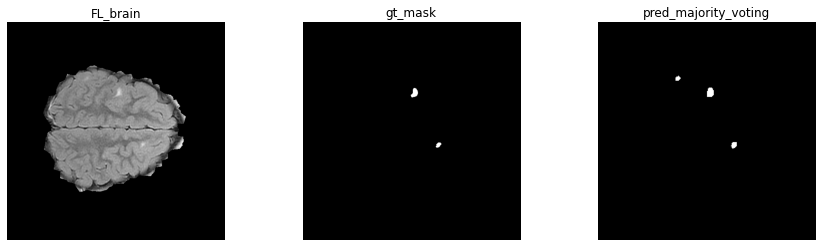

21


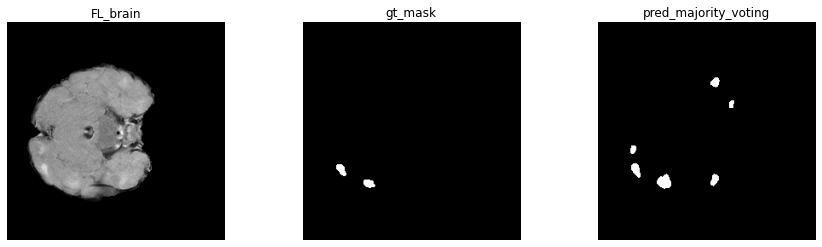

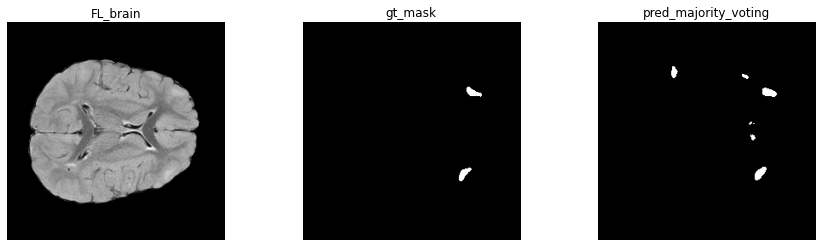

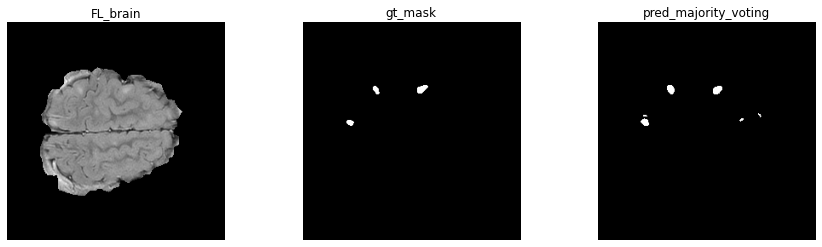

8


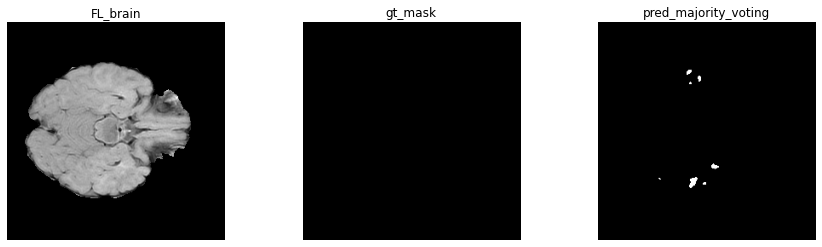

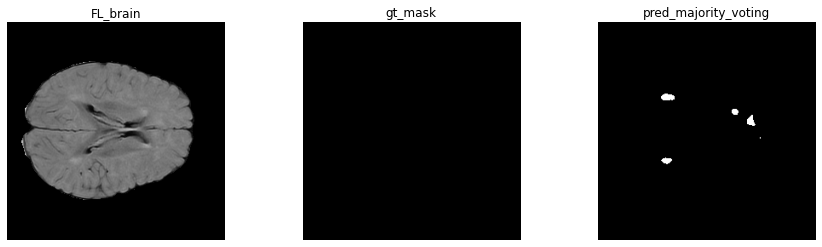

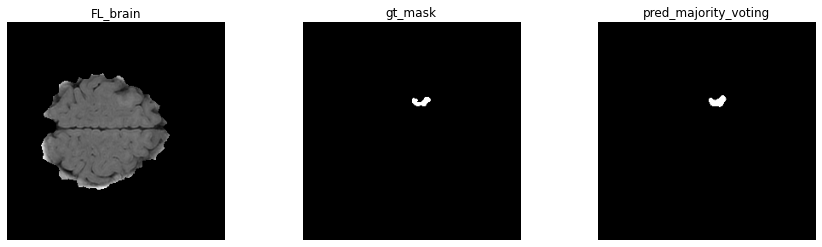

6


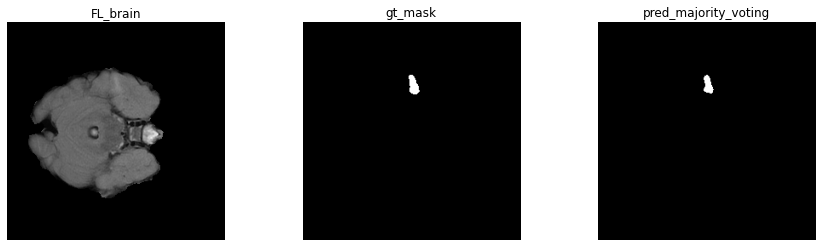

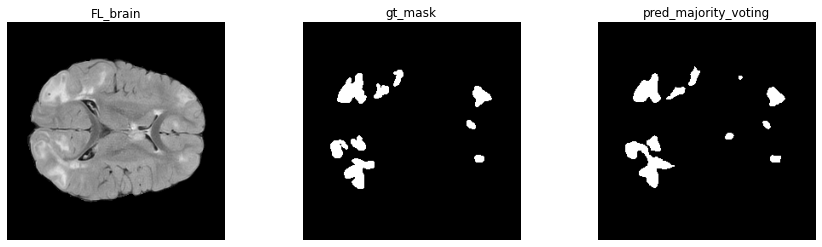

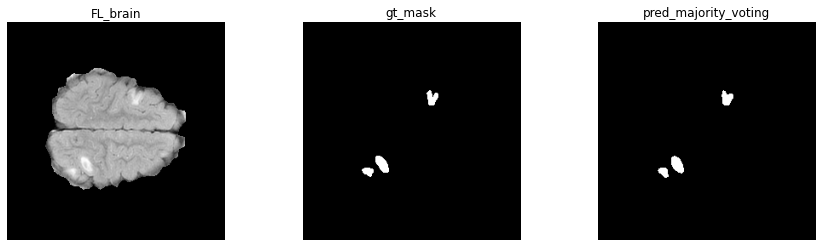

31


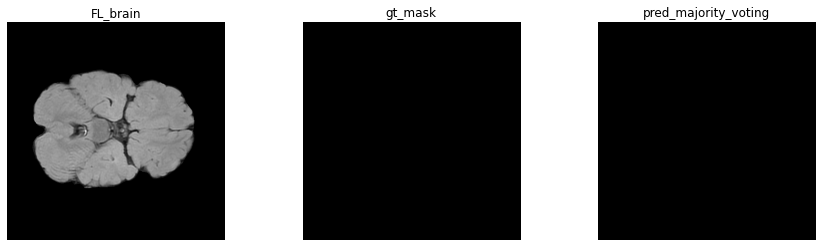

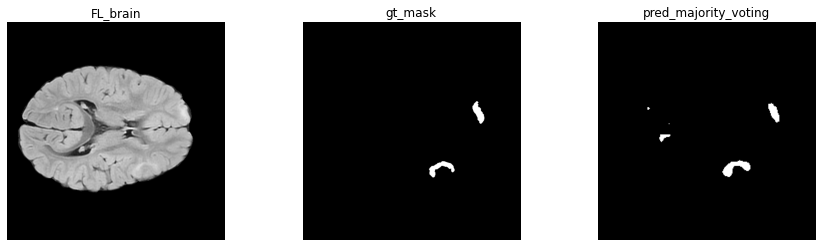

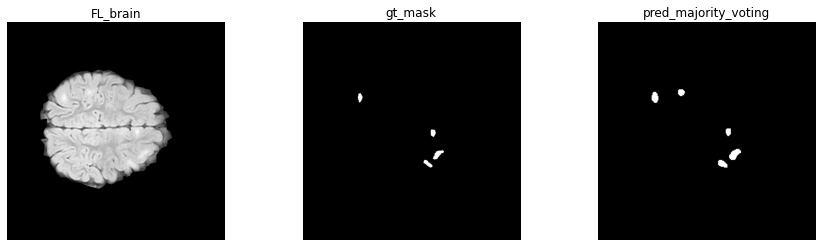

In [24]:
for here_idx in range(8):
    
    real_idx = meta_info['testid2orig'][meta_info['test2id'][str(here_idx + 100)]]
    here_idx = str(here_idx)
    print(real_idx)
    
    preds = [result_dict['datav5_both'][str(sid)][here_idx] for sid in all_idx]
    scout = nib.load(preds[0])
    summary = np.zeros((len(preds), *scout.get_data().shape))
    summary[0] = scout.get_data()
    for i in range(1, summary.shape[0]):
        summary[i] = nib.load(preds[i]).get_data()
    summary[0].sum()
    
    majority_voting = summary.mean(axis=0) >= 2/summary.shape[0]
    for c in range(10, summary[0].shape[2] - 5, summary[0].shape[2]//4):
        plot_many(nib.load(NEW_INTEG['test'][real_idx]['FL_brain']).get_fdata(), 
                  nib.load(NEW_INTEG['test'][real_idx]['mask_orig']).get_fdata(),
                  majority_voting, 
                  Title = ['FL_brain', 'gt_mask', 'pred_majority_voting'],
                  if_numpy=True,
                  cut=c)
#     for i in range(summary.shape[0]//3):
#         plot_many(*summary[3*i:3*(i+1)], if_numpy=True)
#         break

In [39]:
# # Resulting dict per subject.
# mods = [k for k in PREP.sub_dict['sub1'].keys() if 'mat' not in k]
# plot_many(*[PREP.sub_dict['sub1'][m] for m in mods])